IMPORT LIBRARY DAN LOAD DATA

In [13]:
import pandas as pd

In [4]:
data = pd.read_csv("Churn_Modelling.csv")
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Fitur:

RowNumber: Nomor urut yang diberikan kepada setiap baris dalam dataset.

CustomerId: Identifier unik untuk setiap pelanggan.

Surname: Nama belakang pelanggan.

CreditScore: Skor kredit pelanggan.

Geography: Lokasi geografis pelanggan (misalnya, negara atau wilayah).

Gender: Jenis kelamin pelanggan.

Age: Usia pelanggan.

Tenure: Jumlah tahun pelanggan telah menjadi nasabah bank.

Balance: Saldo rekening pelanggan.

NumOfProducts: Jumlah produk bank yang dimiliki pelanggan.

HasCrCard: Menunjukkan apakah pelanggan memiliki kartu kredit (biner: ya/tidak).

IsActiveMember: Menunjukkan apakah pelanggan adalah anggota aktif (biner: ya/tidak).

EstimatedSalary: Gaji perkiraan pelanggan.

Exited: Menunjukkan apakah pelanggan telah keluar dari bank (biner: ya/tidak).

# BUSINESS PROBLEM
dalam industri perbankan , customer churn (nasabah berhenti menggunakan layanan bank), merupakan masalah penting karena:

a. tingginya churn dapat mengindikasikan bahwa terdapat masalah layanan, produk, atau segmentasi nasabah

b. biaya untuk mempertahankan nasabah lebih murah daripada biaya mencari biaya nasabah baru

c. Akan menimbulkan kerugian besar bagi bank jika customer yang churn memiliki lifetime value yang tinggi.

Dengan memahami karakteristik nasabah yang churn , bank dapat:

a. mengurangi potensi kehilangan pendapatan

b. meningkatkan kepuasaan dan loyalitas pelanggan

c.menyusun strategi retensi yang lebih tepat

masalah yang ingin dijawab:

a. faktor apa saja yang paling berpengaruh terhadap keputusan nasabah untuk keluar dari bank?

b. apakah karakteristik tertentu( usia, saldo, keaktifan, jumblah produk,dll) mempengaruhi risiko churn?

tujuan analisis:

a. Melakukan EDA untuk memahami pola churn nasabah

b.mengidentifikasi varibael yang berkorelasi dengan churn

c. membangun model machine learning sederhana untuk memprediksi churn

d. memberikan insight bisnis yang dapat digunakan sebagai dasar pengambilan keputusan

# DATA UNDERSTANDING

In [5]:
data.shape

(10000, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Data berisi informasi geografis, finansial, dan perilaku nasabah bank. Target variabel adalah Exited yang menunjukkan apakah nasabah keluar dari bank atau tidak

In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

dataset tidak memiliki missing value

In [9]:
data = data.drop (columns = ['RowNumber','CustomerId','Surname'])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


menghapus kolom identitas karena tidak memiliki pengaruh yang prediktif terhadap nasabah yang churn

In [11]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

terdapat imbalance pada data, dimana jumblah nasabah yang churn lebih sedikit daripada yang tidak churn

# EXPORATORY DATA ANALYSIS 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

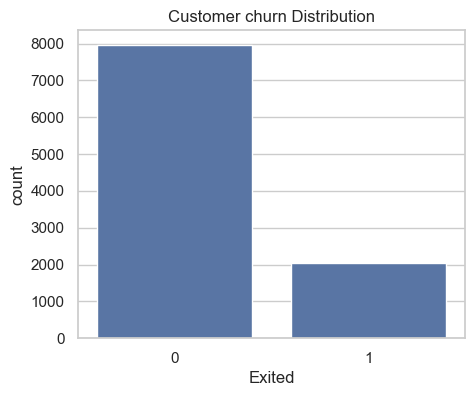

In [16]:
plt.figure (figsize = (5,4))
sns.countplot(x = 'Exited', data = data)
plt.title("Customer churn Distribution")
plt.show()

insight: sebagian besar nasabah tidak churn , namun terdapat proposi sekitar 20 % dari nasabah yang churn, sehingga masalah ini perlu diperhatikan

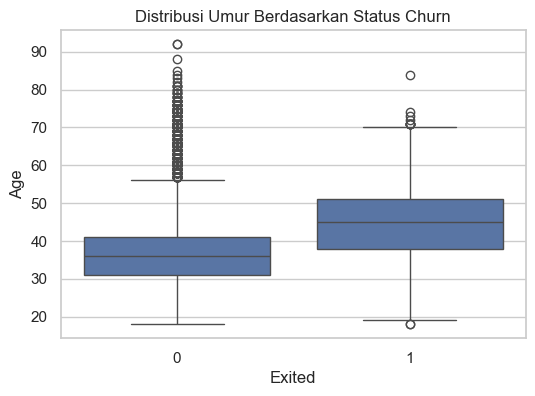

In [17]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'Exited', y = 'Age', data = data)
plt.title('Distribusi Umur Berdasarkan Status Churn')
plt.show()

insight: nasabah yang churn cenderung memiliki usia yang jauh lebih tinggi daripada nasabah yang tidak churn

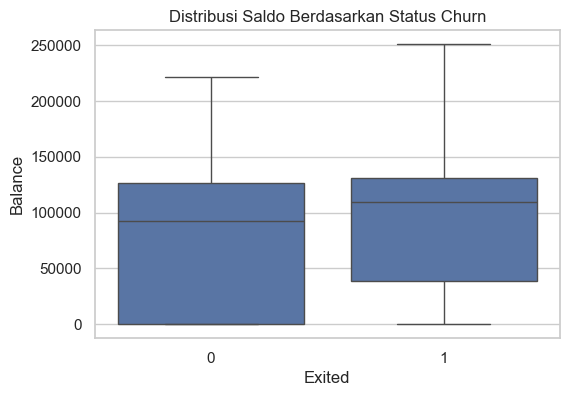

In [19]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'Exited', y = 'Balance',data = data)
plt.title("Distribusi Saldo Berdasarkan Status Churn")
plt.show()

insight: Nasabah yang memiliki saldo yang lebih tinggi cenderung memiliki risiko churn yang lebih besar dibandingkan nasabah dengan saldo rendah atau 0

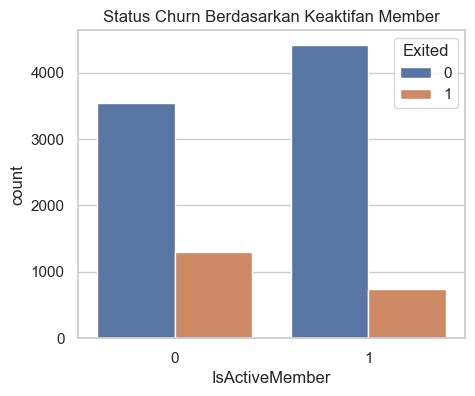

In [20]:
plt.figure(figsize = (5,4))
sns.countplot (x = 'IsActiveMember', hue = 'Exited', data = data)
plt.title ("Status Churn Berdasarkan Keaktifan Member")
plt.show()

insight : nasabah yang tidak aktif memiliki potensi churn yang lebih tinggi dibandingkan nasabah yang aktif

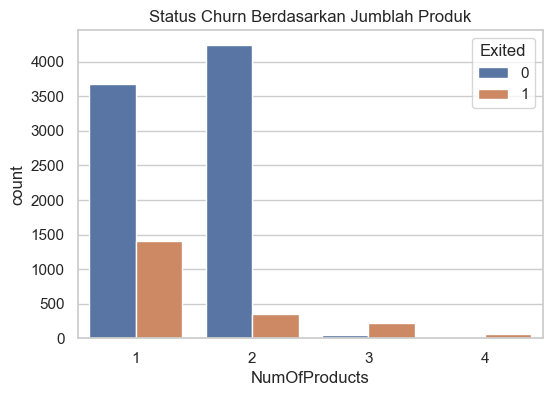

In [23]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'NumOfProducts', hue = 'Exited', data = data)
plt.title("Status Churn Berdasarkan Jumblah Produk")
plt.show()

insgiht : nasabah dengan jumblah produk yang lebih sedikit cenderung lebih mudah churn, namun mungkin ada pola jumblah produk tertentu yang memengaruhi churn 

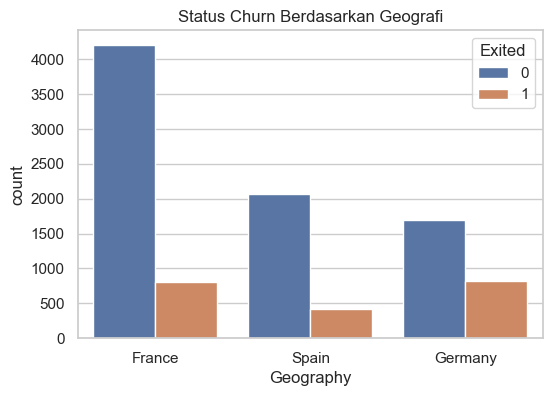

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(x = "Geography", hue="Exited", data = data)
plt.title("Status Churn Berdasarkan Geografi")
plt.show()


insight : tingkat churn berbeda setiap wilayah , ini bisa menunjukkan ada faktor lokasi dan kebijakan masing masing negara yang mempengaruhi keputusan nasabah untuk churn

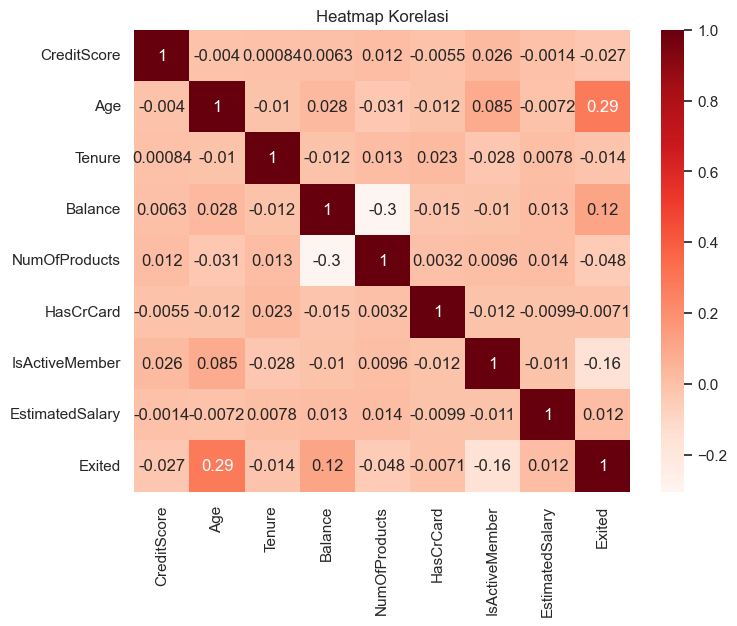

In [30]:
plt.figure(figsize = (8,6))
sns.heatmap(data.select_dtypes(include = 'number').corr(), annot = True, cmap ='Reds')
plt.title("Heatmap Korelasi")
plt.show()

Kesimpulan: dari hasil EDA ini, ditemukan bahwa usia nasabah, tingkat kektifan , saldo dalam rekening, dan lokasi geografis memiliki hubungan dengan churn. Nasabah yang lebih tua , tidak aktif, dan memiliki saldo yang tinggi cenderung memiliki risiko churn yang lebih besar

# ENCODING DAN SPLITTING

In [31]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
# memisahkan kolom variabel target untuk diprediksi  agar mengetahui pola churn nanti
X = data.drop('Exited', axis = 1)
y = data['Exited']

In [34]:
X = pd.get_dummies(X, columns = ["Geography", "Gender"], drop_first = True)


menggunakan one-hot encoding karena model machine learning tidak memproses data bertipe string ( geogrrafi dan gender), sehingga harus diubah jadi numerik dan tidak ada hubugan ordinal antara tipe data string, contohnya : france tidak lebih besar germany atau sebaliknya.

In [39]:
from sklearn.model_selection import train_test_split
# data dibagi menjadi 80% data latih model  dan 20 % data uji untuk evaluasi kemampuan model
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [40]:
print(f"Jumblah data training: {X_train.shape}")
print(f"Jumblah data testing: {X_test.shape}")

Jumblah data training: (8000, 11)
Jumblah data testing: (2000, 11)


# MODELLING

melakukan pelatihan model dengan memperhatikan imbalanced data. kita akan menggunakan 3 model, yaitu :

a.Logistic Regression(sebagai baseline model dan cocok untuk binary classification)

b. Decision tree(menangkap hubungan non-linear)

c.Random forest( Ensemble dari banyak decision tree dan mengurangi overfitting)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform (X_train)
X_test_scaled = scaler.transform(X_test)

stadardization memastikan semua fitur memiliki skala yang sebanding sehingga tidak mendominasi proses pembelajaran model, ini cocok untuk model seperti logistic regression

In [59]:
# logistic regression 
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000, class_weight = 'balanced')
lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [61]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=5,class_weight = 'balanced')
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [63]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=6,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [64]:
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression" : lr,
    "Decision Tree" : dt,
    "Random Forest": rf
}

akurasi_model = {}

for nama, model in models.items():
    if nama == 'Logistic Regression':
        y_pred = model.predict(X_test_scaled)
    else :
        y_pred = model.predict(X_test)
    akurasi_model[nama] = accuracy_score(y_test, y_pred)

for key,value in akurasi_model.items():
    print(f"model: {key}, dengan akurasi : {value}")

model: Logistic Regression, dengan akurasi : 0.7195
model: Decision Tree, dengan akurasi : 0.7375
model: Random Forest, dengan akurasi : 0.814


<function matplotlib.pyplot.show(close=None, block=None)>

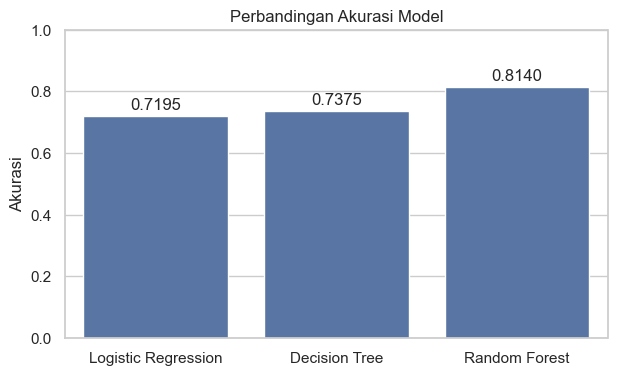

In [65]:
plt.figure (figsize = (7,4))
plots = sns.barplot(
    x = list(akurasi_model.keys()),
    y =list(akurasi_model.values())
)
plt.title("Perbandingan Akurasi Model")
plt.ylabel("Akurasi")
plt.ylim(0,1)
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '.4f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
plt.show

dari hasil modelling , menunjukkan bahwa random forest memiliki performa terbaik denagn akurasi : 0.8140, dibandingkan model lainnya(logistic regression : 0.7195, decision tree: 0.7375), ini menunjukkan bahwa random forest baik dalam menangkap pola data yang kompleks dalam data

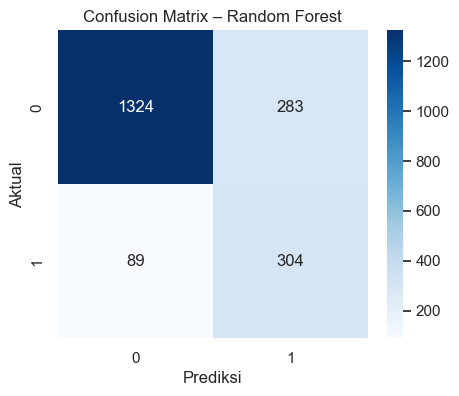

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      1607
           1       0.52      0.77      0.62       393

    accuracy                           0.81      2000
   macro avg       0.73      0.80      0.75      2000
weighted avg       0.85      0.81      0.83      2000



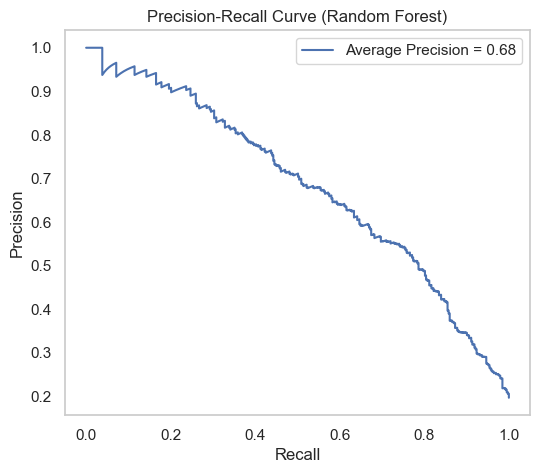

In [67]:
# confussion matrix dan classification report (model random_forest)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, average_precision_score

#confussion matrix
y_pred_rf = rf.predict(X_test)

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix – Random Forest")
plt.show()

# classification report
print(classification_report(y_test, y_pred_rf))

# prc curve
y_scores = rf.predict_proba(X_test)[:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.2f}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Random Forest)")
plt.legend()
plt.grid()
plt.show()

penjelasan report model random_forest:
# confussion matrix:
True Negative (1324)
-> Nasabah tidak churn dan berhasil diprediksi tidak churn
False Positive (283)
-> Nasabah tidak churn, tapi diprediksi churn
False Negative (89)
->Nasabah churn, tapi gagal terdeteksi
True Positive (304)
->Nasabah churn dan berhasil terdeteksi

model cukup baik dalam mendeteksi nasabah yang churn walau masih terdapat sejumblah nasabah yang gagal diprediksi

# classification report:
recall : 0.77
dari seluruh nasabah yang benar- benar churn, 77% berhasil terdeteksi oleh mode

precision : 0.52
dari seluruh nasabah yang diprediksi churn , 52 % benar benar churn, ini berarti masih ada false alarm( data yang seharusnya tidak churn, diprediksi churn) 

f1-score: 0.62
menunjukkan keseimbangan antara precision dan recall, walaupun tidak besar, model cukup baik dalam mengklasifikasikan churn
Accuracy: 0.81
cukup tinggi, namun data tidak seimbang

Model Random Forest dengan class balancing menunjukkan performa yang baik dalam mendeteksi nasabah churn, dengan recall sebesar 77%.
Meskipun precision masih dapat ditingkatkan, model ini efektif sebagai alat deteksi dini untuk program retensi nasabah.

# PRC-curve
Area Recall Rendah (0 – 0.3) dan precision (> 0.9)
Model sangat yakin ketika memprediksi churn, tapi hanya menangkap sedikit churn
Cocok jika:
Biaya salah memberi promo sangat mahal
Fokus ke churn paling “pasti”
Area Recall Menengah (0.4 – 0.7)dan precision (~0.6 – 0.7)
Model mampu menangkap sebagian besar nasabah churn dengan tingkat false alarm yang masih dapat diterima.

Area Recall Tinggi (0.8 – 1.0) dan precision (< 0.4)
Hampir semua churn terdeteksi, tetapi banyak nasabah non-churn ikut tertarget
cocok jika:
Bank tidak keberatan biaya retensi besar
Retensi bersifat murah (misalnya email otomatis)

walau terdapat imbalanced pada data . average precision (0.68) menunjukkan bahwa model memiliki kemampuan cukup baik dalam mengklasifikasi nasabah berdasarkan risiko churn
model ini efektif dalam memprioritaskan nasabah dengan risiko churn yang tinggi

In [68]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance.head(10)


,Feature,Importance
1,Age,0.405320
4,NumOfProducts,0.280368
3,Balance,0.079689
6,IsActiveMember,0.074735
8,Geography_Germany,0.066872
10,Gender_Male,0.025944
0,CreditScore,0.025145
7,EstimatedSalary,0.024667
2,Tenure,0.010834
9,Geography_Spain,0.003782


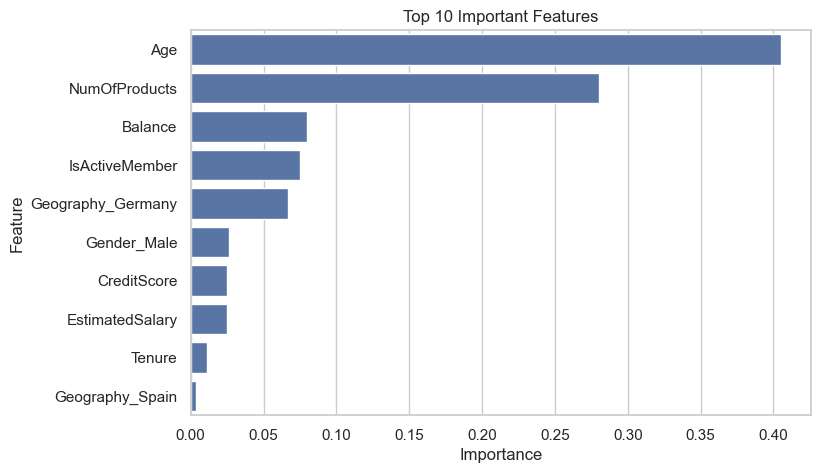

In [69]:
plt.figure(figsize=(8,5))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance.head(10)
)
plt.title("Top 10 Important Features")
plt.show()


Fitur seperti usia, tingkat keaktifan nasabah, jumblah produk dan saldo rekening memiliki kontribusi besar dalam memprediksi churn.

# REKOMENDASI BISNIS
bank dapat menggunakan model ini untuk:

a. Mengidentifikasi segmen nasabah berisiko churn, sebagai alat pendeteksi dini

b. Memprioritaskan program retensi untuk nasabah bernilai tinggi

c. Menyesuaikan threshold prediksi sesuai kapasitas tim marketing dan biaya program retensi, misalnya:
Untuk program retensi terbatas(telepon, personal, relatiosnhip manager khusus), threshold dapat dinaikkan untuk meningkatkan precision agar benar- benar meneargetkan nasabah yang churnnya benar -benar besar.Sebaliknya, untuk program retensi massal(email promo, reminder otomatis), threshold dapat diturunkan untuk meningkatkan recall agar tidak ada nasabah yang churn terlewat.